In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Data Collection
table = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
table

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


In [6]:
# Data Analysis I
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [7]:
# Data Analysis II
table.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [8]:
# Data Cleaning
table.fillna(0, inplace=True)
table.head(5)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


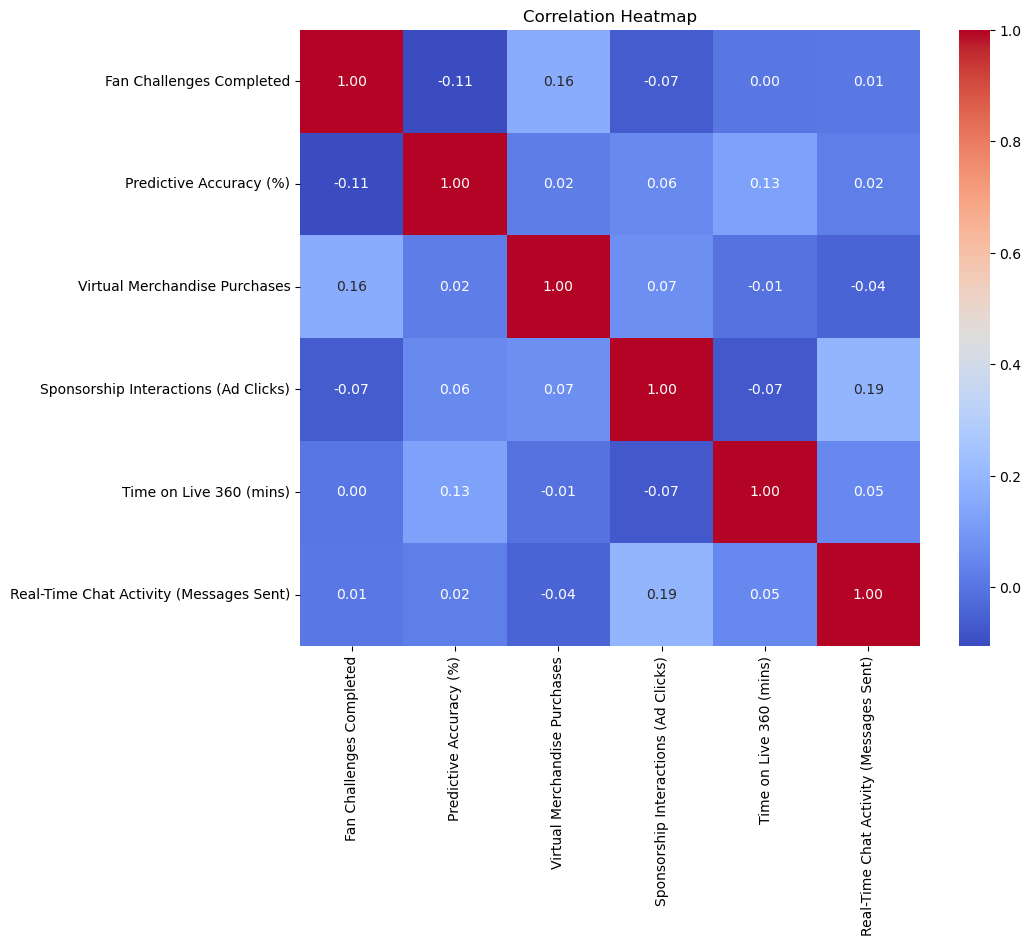

In [12]:
numeric_table = table.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix + TREND ANALYSIS
correlation_matrix = numeric_table.corr()

# Plotting the heatmap (VISUALIZATION I)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

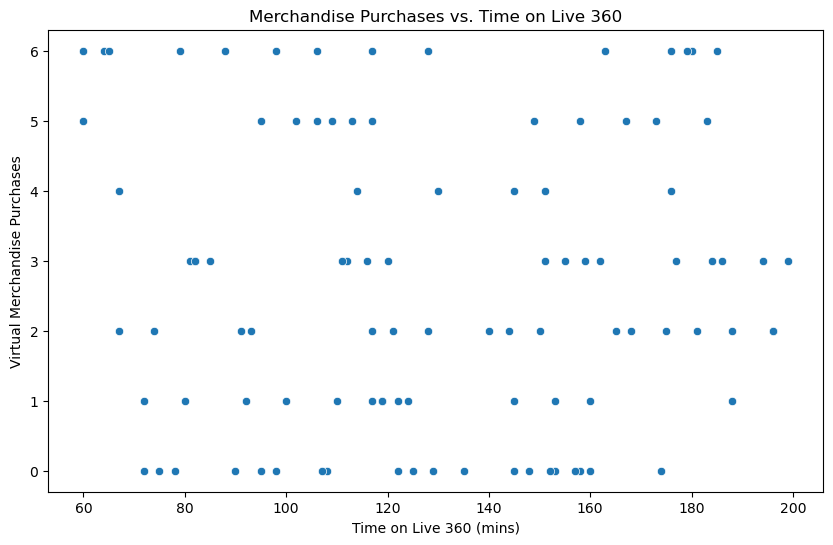

In [10]:
# Scatter plot to visualize the relationship
# VISUALIZATION II

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', data=table)
plt.title("Merchandise Purchases vs. Time on Live 360")
plt.xlabel("Time on Live 360 (mins)")
plt.ylabel("Virtual Merchandise Purchases")
plt.show()

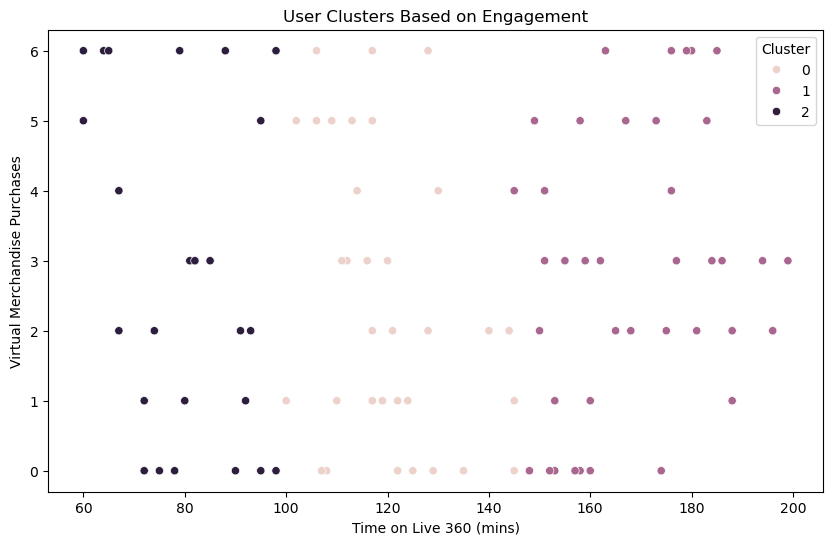

In [11]:
features = table[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                  'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                  'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

# Running K-Means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
table['Cluster'] = kmeans.fit_predict(features)

# Visualizing clusters (VISUALIZATION III)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', hue='Cluster', data=table)
plt.title("User Clusters Based on Engagement")
plt.xlabel("Time on Live 360 (mins)")
plt.ylabel("Virtual Merchandise Purchases")
plt.legend(title='Cluster')
plt.show()

New Fan Challenge: Predict & Win

Description: Users participate in a challenge where they predict key race outcomes, such as the winning team, the fastest lap, or the highest number of laps completed. Correct predictions earn points, and users can compete for leaderboard positions. Additional bonus points can be earned for consecutive correct predictions.

Predicted Outcomes:
* Engagement Increase:
  - Leveraging the current interest in fan challenges, this could result in a 30% increase in user participation, as fans enjoy engaging with the excitement of prediction.
* Monetization: By gamifying predictions and creating a competitive leaderboard, we anticipate a 20% increase in virtual merchandise purchases as users aim to enhance their chances of winning with unique merchandise (e.g., team jerseys).